2023-05-30 00:39:18.178317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.627e-01|  1.494e-01|          156622|     7.077e-02|     3.667e-02|              38456|   2.083e-02|   1.077e-02|          

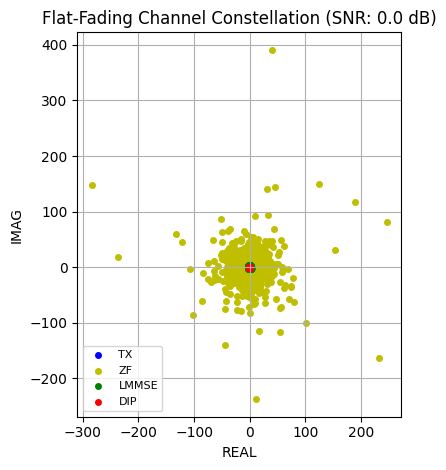

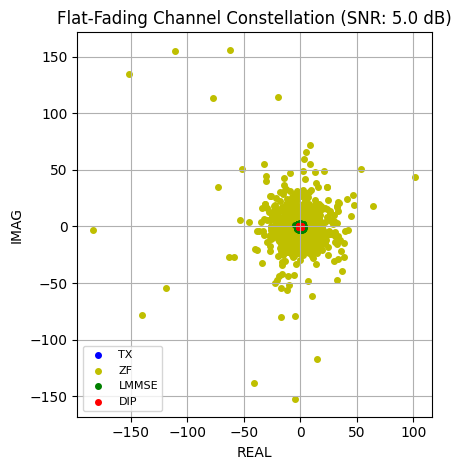

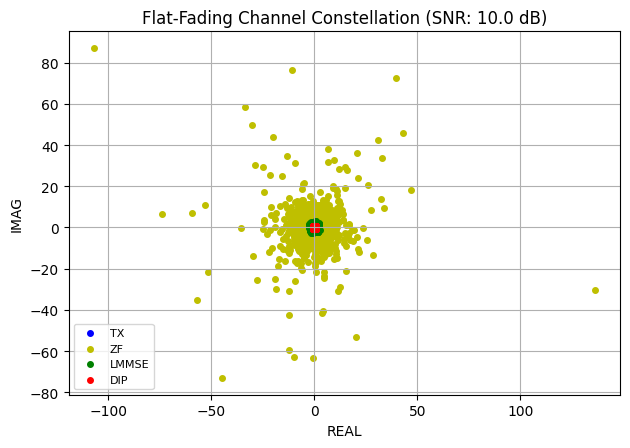

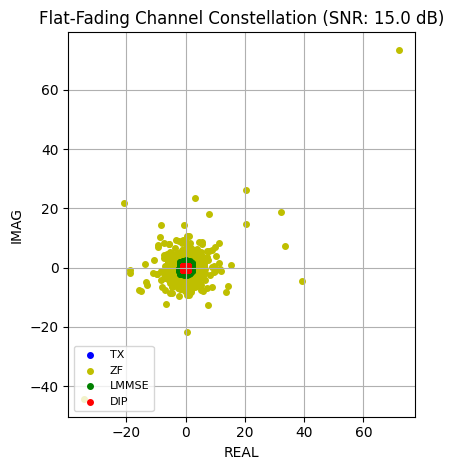

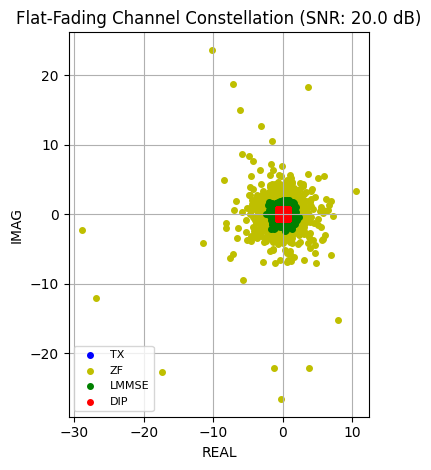

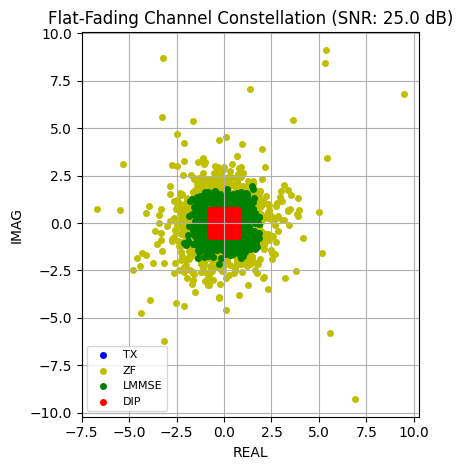

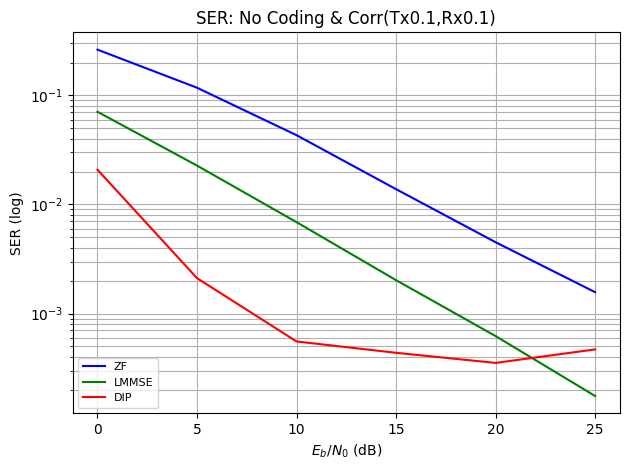

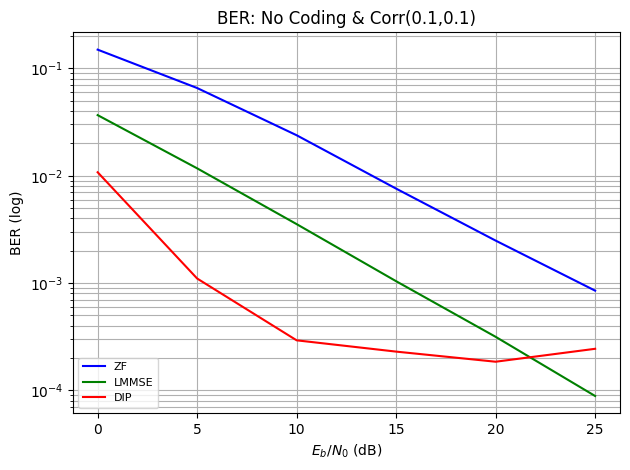

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  5.522e-01|  3.357e-01|          351979|     2.462e-01|     1.333e-01|             139796|   2.057e-01|   1.114e-01|           116831|      4.477e+03|
|---

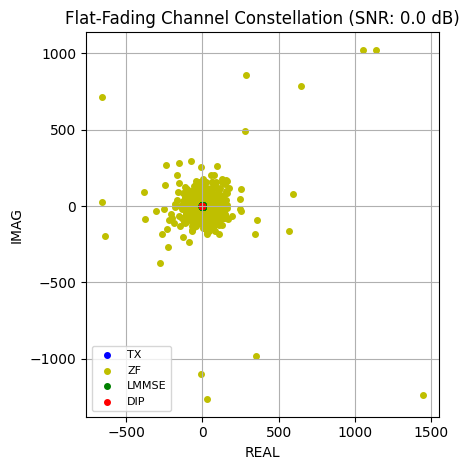

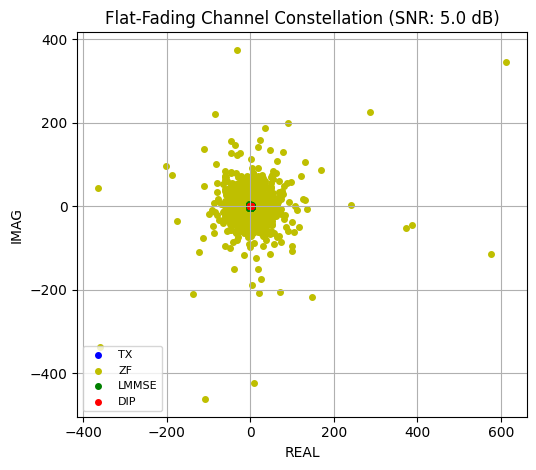

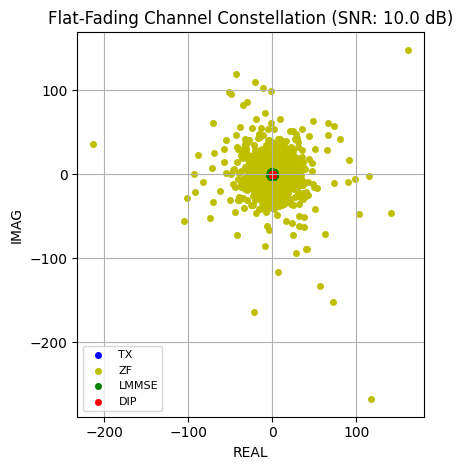

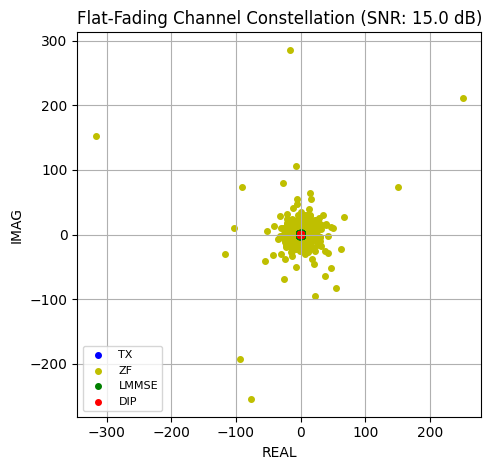

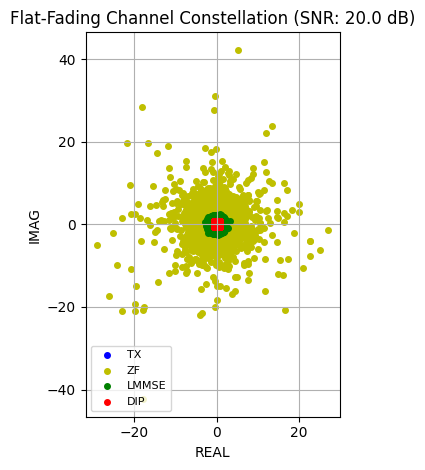

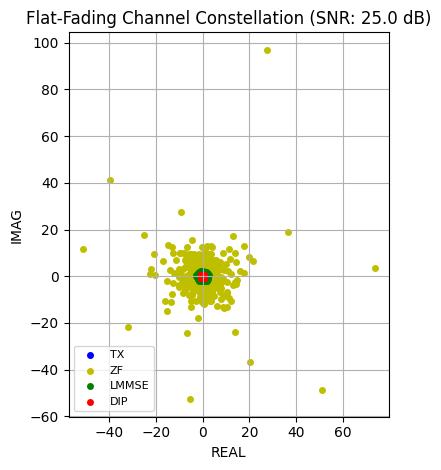

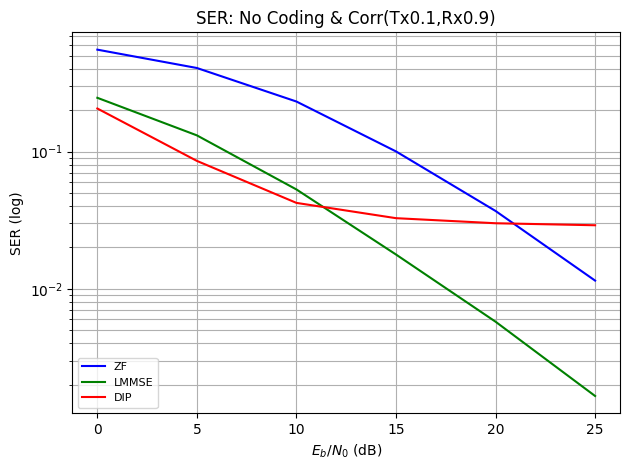

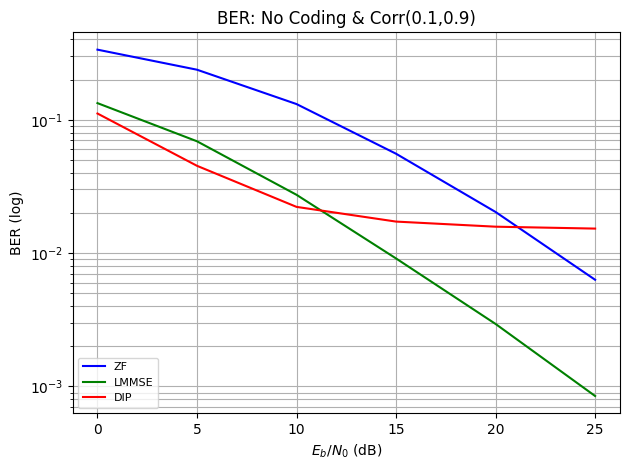

|                                                         TX_ANT_CORRELATION: 0.9 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  5.520e-01|  3.355e-01|          351828|     2.485e-01|     1.342e-01|             140682|   2.130e-01|   1.144e-01|           119992|      5.336e+03|
|---

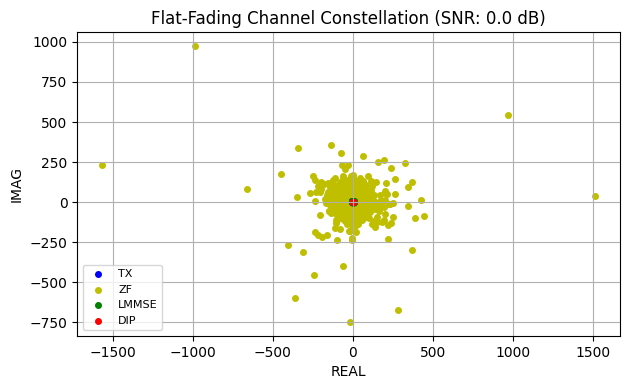

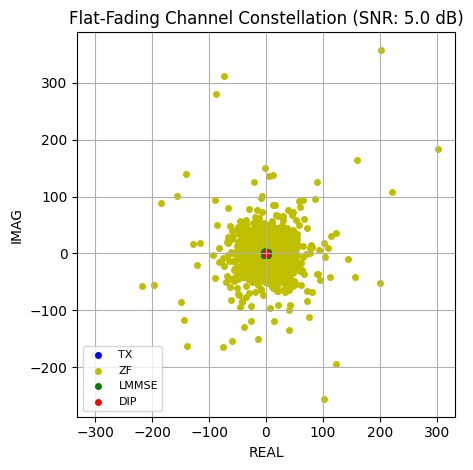

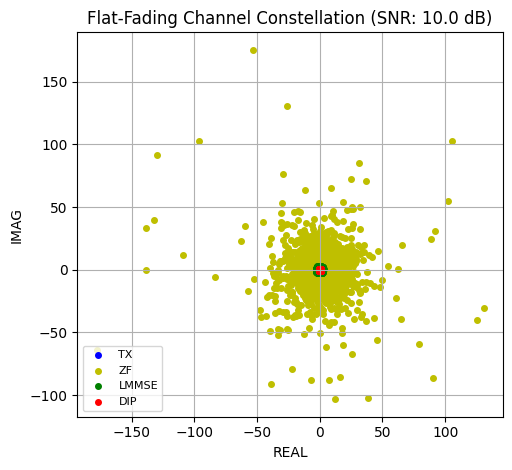

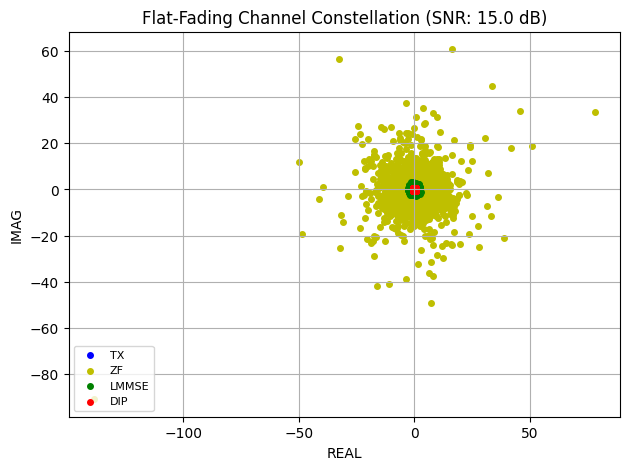

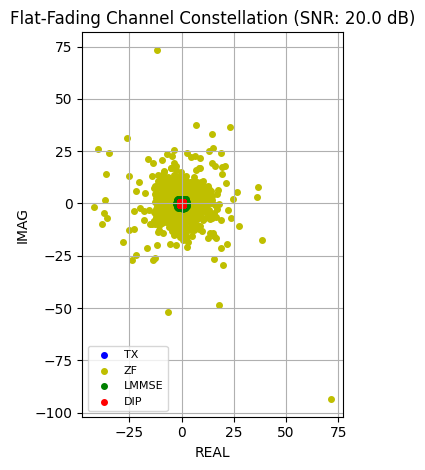

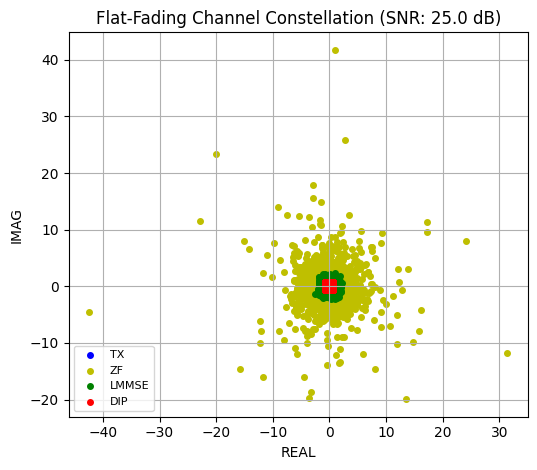

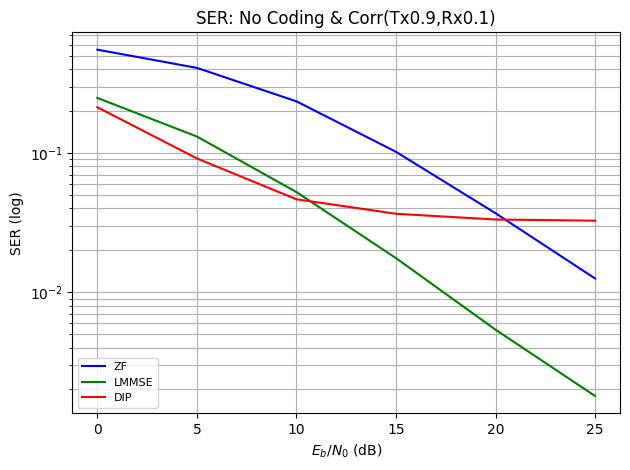

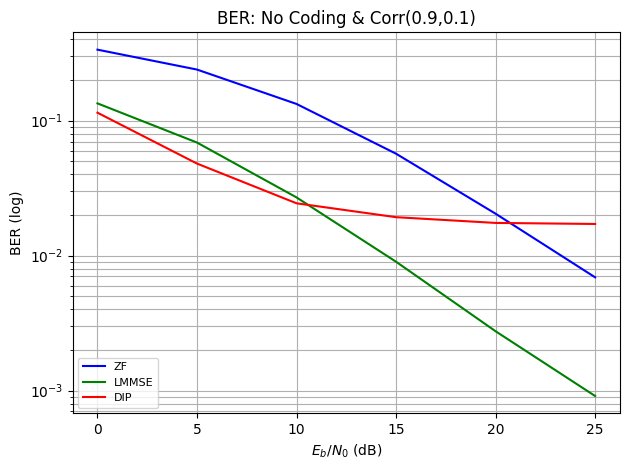

|                                                         TX_ANT_CORRELATION: 0.9 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  6.834e-01|  4.387e-01|          460048|     3.985e-01|     2.256e-01|             236556|   4.063e-01|   2.312e-01|           242480|      6.692e+03|
|---

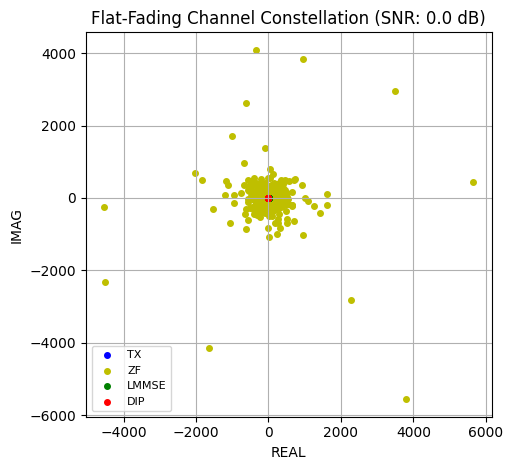

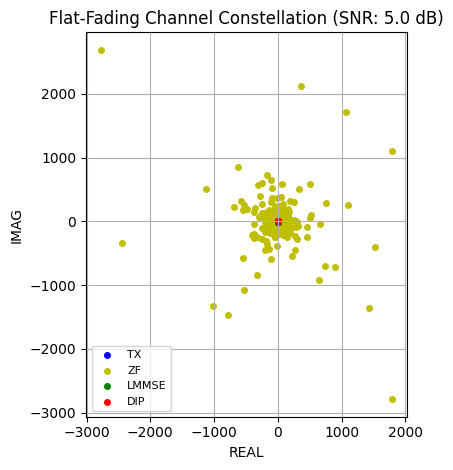

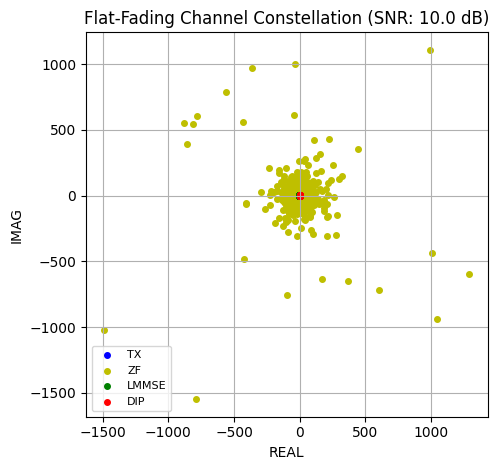

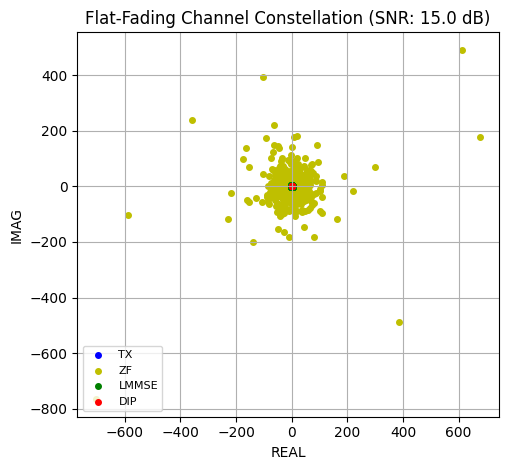

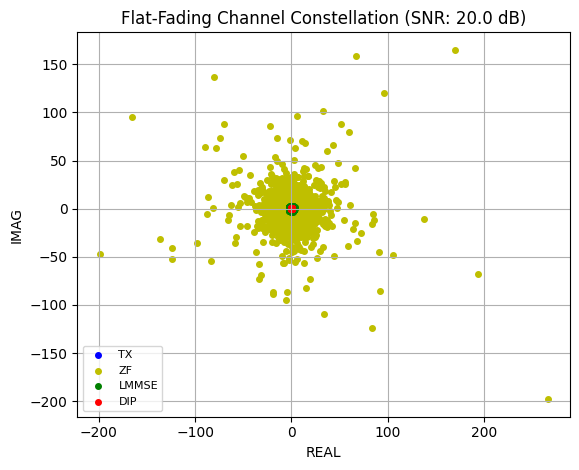

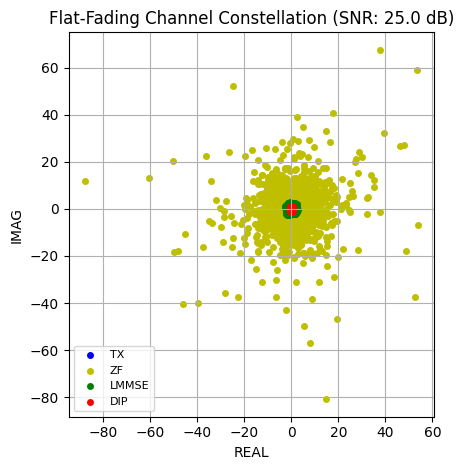

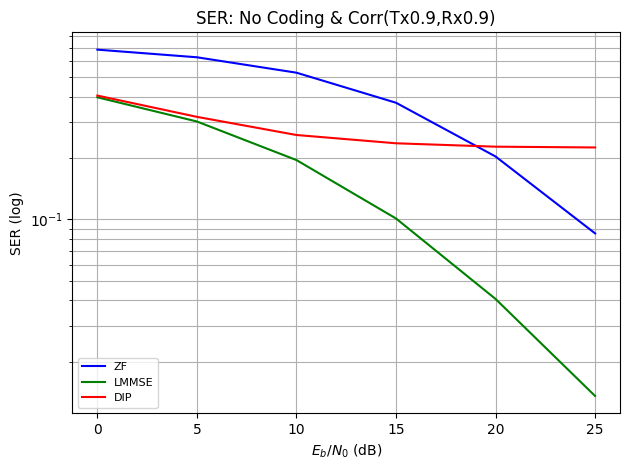

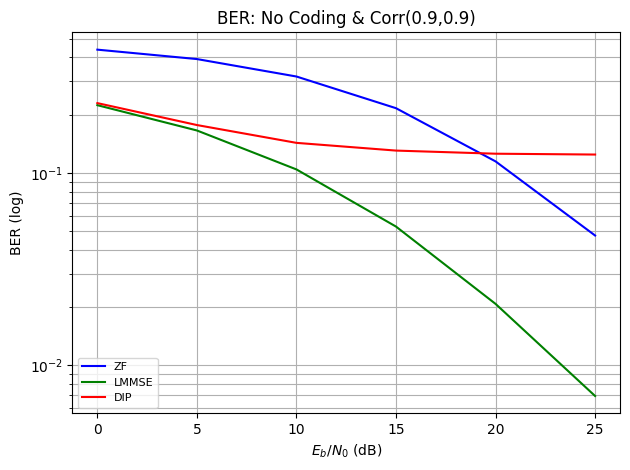

(array([ 0.,  5., 10., 15., 20., 25.]),
 array([[0.26266098, 0.11758995, 0.04317856, 0.01381683, 0.00450897,
         0.00156975],
        [0.55218315, 0.40586281, 0.2312603 , 0.10015678, 0.03689003,
         0.01147079],
        [0.55203629, 0.40835571, 0.23474312, 0.1018486 , 0.03688431,
         0.01253319],
        [0.68342972, 0.62693596, 0.52650452, 0.37468529, 0.2038784 ,
         0.08536339]]),
 array([[7.07740784e-02, 2.27317810e-02, 6.88934326e-03, 2.02369690e-03,
         6.21795654e-04, 1.75476074e-04],
        [2.46198654e-01, 1.31099701e-01, 5.29060364e-02, 1.77688599e-02,
         5.75637817e-03, 1.65557861e-03],
        [2.48497009e-01, 1.31181717e-01, 5.23509979e-02, 1.75533295e-02,
         5.37490845e-03, 1.79481506e-03],
        [3.98496628e-01, 3.03022385e-01, 1.95789337e-01, 1.01062775e-01,
         4.06284332e-02, 1.35440826e-02]]),
 array([[2.08301544e-02, 2.11334229e-03, 5.55038452e-04, 4.36782837e-04,
         3.52859497e-04, 4.69207764e-04],
        [2.057247

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeYCorr import ncodencorr

Block_Length = 1024        # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 2    # Correlation Points between Max and Min

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 128           # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0          # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 25.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 6        # EBNO Points

model_ncodencorr = ncodencorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CORRELATION_INDEX_MIN,
                                CORRELATION_INDEX_MAX,
                                CORRELATION_INDEX_POINTS)

model_ncodencorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)